In [36]:
# import the libraries you need

import os
import math
import numpy as np
import rasterio
from tqdm import tqdm
import requests
import matplotlib.pyplot as plt
import glob

from osgeo import gdal
import matplotlib.image as mpimg
from matplotlib.image import imread
from itertools import product
from PIL import Image
from itertools import chain
import json
from jsonpath import jsonpath 

from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import type_of_target

import tensorflow as tf
import torch
# Folium setup.
import folium

var DE_Forest =Picea_abies.merge(Fagus_sylvatica).merge(Pinus_sylvestris).merge(Quercus_robur).merge(Betula_pendula)
.merge(Quercus_petraea).merge(Fraxinus_excelsior).merge(Acer_pseudoplatanus).merge(Sorbus_aucuparia).merge(Carpinus_betulus)
.merge(Larix_decidua).merge(Abies_alba).merge(Pseudotsuga_menziesii).merge(Frangula_alnus).merge(Alnus_glutinosa)
.merge(Prunus_avium).merge(Populus_tremula).merge(Larix_kaempferi).merge(Quercus_rubra).merge(Acer_campestre)

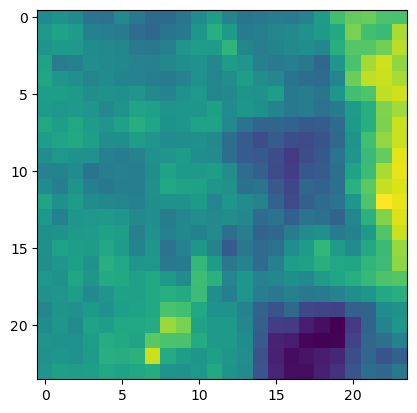

In [75]:

data_path = '/Users/siruiwang/Documents/ESPACE-LECTURE/3rd_semester/Data science of earth observation/Project_data_science/TestSet/Betula pendula/'
index=5
tree_type = 'Betula_pendula'
kernel=24
bands=30
images_tiff = np.zeros((100,24,24,30), dtype=float)
for i in range(0,99):
    image_path=os.path.join(data_path,( "% s" % i+".tif"))
    data=np.zeros((24,24,30), dtype=float)
    dataset = gdal.Open(image_path)
    for x in range(1, dataset.RasterCount + 1):
        band = dataset.GetRasterBand(x)
        array = band.ReadAsArray()
        data[:,:,x-1]=array
    images_tiff[i,:]=data

plt.imshow(images_tiff[1,:,:,1])


In [76]:
def navie_sample(src_image, label):
    # forest-1, debris-2, water-3
    classes = label
    # get the feature space from drone image
    #with rasterio.open(src_image) as src_ds:
    #    src = src_ds.read()
       
    yield (src_image, label)

In [77]:
########### define the result train/valid file #############
### Here the tiles are then saved into numpy arraies
root = r"/Users/siruiwang/Documents/ESPACE-LECTURE/3rd_semester/Data science of earth observation/Project_data_science/data0131/npy/"

# training samples
t_root = root + tree_type + "_samples.npy"
t_sample = []
num_sam = images_tiff.shape[0]
for i in range(0,num_sam-1):
    result = list(navie_sample(images_tiff[i], index))
    t_sample.append(result)
t_sample_array = np.array(t_sample, dtype=object)
print(t_sample_array.shape)
np.save(t_root, t_sample_array)

(99, 1, 2)
